## INFX574 Problem Set 4 ##
#### Your name: Harkar Singh Talwar####
#### Deadline: Wed, May 16, 5:30 ####

In [1]:
# import common modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Explore the Data ###

#### Step 1. Load the data. You may drop id or just ignore it in the rest of your analysis. ####

In [2]:
wdbc = pd.read_csv("wdbc.csv.bz2")

In [3]:
print(wdbc.shape)
wdbc.head()

(569, 32)


,id,diagnosis,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concpoints.mean,...,radius.worst,texture.worst,perimeter.worst,area.worst,smoothness.worst,compactness.worst,concavity.worst,concpoints.worst,symmetry.worst,fracdim.worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
wdbc['diagnosis'].unique() # check values for the diagnosis field

array(['M', 'B'], dtype=object)

In [5]:
# drop the ID field and convert diagnosis to 0 (Benign) and 1 (Malignant)
wdbc_reduced = wdbc.drop(['id'], axis=1)
wdbc_reduced['diagnosis'] = (wdbc_reduced['diagnosis'] == 'M') + 0
wdbc_reduced.head()

,diagnosis,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concpoints.mean,symmetry.mean,...,radius.worst,texture.worst,perimeter.worst,area.worst,smoothness.worst,compactness.worst,concavity.worst,concpoints.worst,symmetry.worst,fracdim.worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Step 2. Create a summary table for each variable ####

In [6]:
# Create a new data frame to hold summary information
results = pd.DataFrame({'Mean': wdbc_reduced.mean(), 'Standard Deviation': wdbc_reduced.std(), 
                        'Range': wdbc_reduced.max() - wdbc_reduced.min(), 'Missing Count': wdbc_reduced.isnull().sum(),
                        'Correlation with Diagnosis': wdbc_reduced.corr().loc['diagnosis']
                       })
results.index.name = "Variable"
results.reset_index()
results

,Correlation with Diagnosis,Mean,Missing Count,Range,Standard Deviation
Variable,,,,,
diagnosis,1.000000,0.372583,0,1.000000,0.483918
radius.mean,0.730029,14.127292,0,21.129000,3.524049
texture.mean,0.415185,19.289649,0,29.570000,4.301036
perimeter.mean,0.742636,91.969033,0,144.710000,24.298981
area.mean,0.708984,654.889104,0,2357.500000,351.914129
smoothness.mean,0.358560,0.096360,0,0.110770,0.014064
compactness.mean,0.596534,0.104341,0,0.326020,0.052813
concavity.mean,0.696360,0.088799,0,0.426800,0.079720
concpoints.mean,0.776614,0.048919,0,0.201200,0.038803


#### Step 3. Graphical exploration. Make a number of scatterplots where you explore the relationship between features and the diagnosis. ####

* Note: A small amount of jitter is added to the outcome data points to better observe the variability in our predictors.

In [7]:
# Function to add a small amount of random noise to an array of points
def add_jitter(arr):
    stdev = 0.023*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

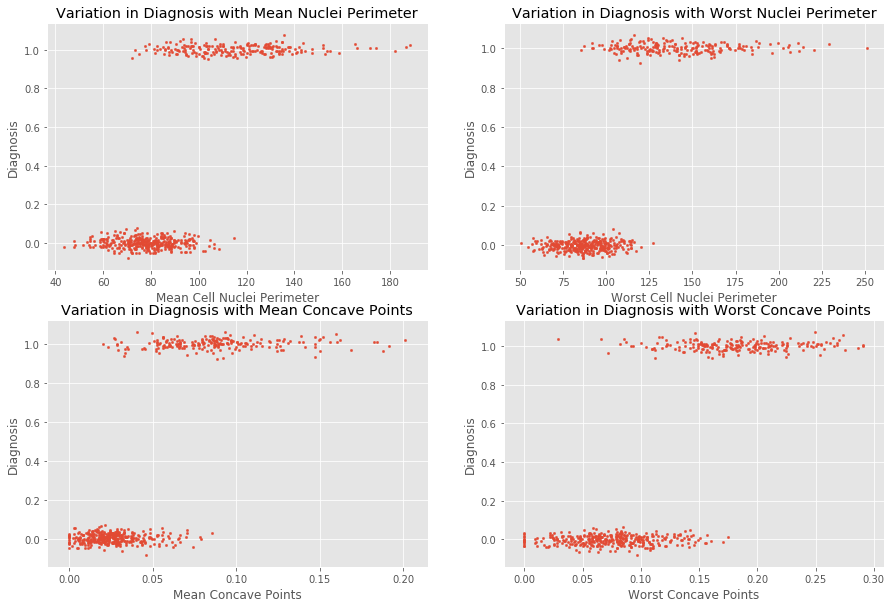

In [8]:
plt.style.use('ggplot')

# Perimeter Mean vs Diagnosis
fig_wdbc = plt.figure(figsize=(15,10))
props_axes = {
    'title': 'Variation in Diagnosis with Mean Nuclei Perimeter',
    'xlabel': 'Mean Cell Nuclei Perimeter',
    'ylabel': 'Diagnosis'
}
axes = fig_wdbc.add_subplot(221)
axes.set(**props_axes)
_ = axes.scatter(wdbc_reduced['perimeter.mean'], add_jitter(wdbc_reduced['diagnosis']), s = 5)

# Perimeter Worst vs Diagnosis
props_axes = {
    'title': 'Variation in Diagnosis with Worst Nuclei Perimeter',
    'xlabel': 'Worst Cell Nuclei Perimeter',
    'ylabel': 'Diagnosis'
}
axes = fig_wdbc.add_subplot(222)
axes.set(**props_axes)
_ = axes.scatter(wdbc_reduced['perimeter.worst'], add_jitter(wdbc_reduced['diagnosis']), s = 5)

# Mean Concave Points vs Diagnosis
props_axes = {
    'title': 'Variation in Diagnosis with Mean Concave Points',
    'xlabel': 'Mean Concave Points',
    'ylabel': 'Diagnosis'
}
axes = fig_wdbc.add_subplot(223)
axes.set(**props_axes)
_ = axes.scatter(wdbc_reduced['concpoints.mean'], add_jitter(wdbc_reduced['diagnosis']), s = 5)

# Worst Concave Points vs Diagnosis
props_axes = {
    'title': 'Variation in Diagnosis with Worst Concave Points',
    'xlabel': 'Worst Concave Points',
    'ylabel': 'Diagnosis'
}
axes = fig_wdbc.add_subplot(224)
axes.set(**props_axes)
_ = axes.scatter(wdbc_reduced['concpoints.worst'], add_jitter(wdbc_reduced['diagnosis']), s = 5)

### 2. Decision Boundary ###

### 2.1 kNN Case ###

#### Step 1. Predict the diagnosis on a grid (say, 100x100) that covers the range of the explanatory variables. Use kNN with k = 3..7 (pick just one value). This gives you 100x100 predicted diagnoses. ####

In [9]:
# Imports required for analysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

**Here we choose perimeter.mean and concpoints.mean as our explanatory variables**

Text(0.5,1,'Perimeter vs Concave Points: Before Scaling')

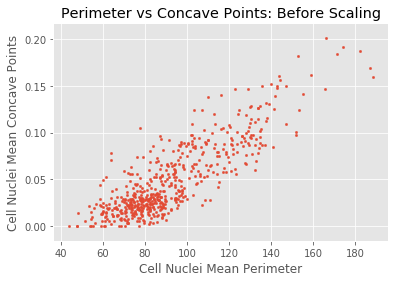

In [10]:
plt.scatter(wdbc_reduced['perimeter.mean'], wdbc_reduced['concpoints.mean'], s=5)
plt.xlabel("Cell Nuclei Mean Perimeter")
plt.ylabel("Cell Nuclei Mean Concave Points")
plt.title("Perimeter vs Concave Points: Before Scaling")

**Perform scaling for our predictors**

In [11]:
wdbc_features = pd.DataFrame(wdbc_reduced[['perimeter.mean', 'concpoints.mean']])
list(wdbc_features.columns)

['perimeter.mean', 'concpoints.mean']

In [12]:
scaler = MinMaxScaler()
scaler.fit(wdbc_features)
scaled_wdbc = pd.DataFrame(scaler.transform(wdbc_features),columns=list(wdbc_features.columns))

Text(0.5,1,'Perimeter vs Concave Points: After Scaling')

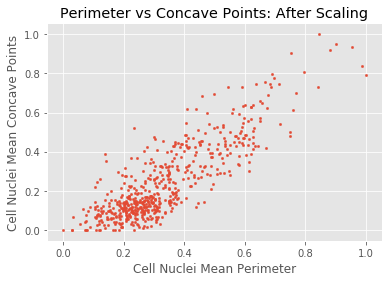

In [13]:
plt.scatter(scaled_wdbc['perimeter.mean'], scaled_wdbc['concpoints.mean'], s = 5)
plt.xlabel("Cell Nuclei Mean Perimeter")
plt.ylabel("Cell Nuclei Mean Concave Points")
plt.title("Perimeter vs Concave Points: After Scaling")

In [14]:
X = scaled_wdbc.as_matrix() # predictors
y = np.ravel(wdbc_reduced[['diagnosis']]) # outcome

**Fit a k-NN model, for k = 5, and Euclidean Distance (p=2) **

In [15]:
wdbc_knn_class = KNeighborsClassifier(n_neighbors=5, p=2)
wdbc_knn_class.fit(X, y) # fit the k-NN model to training data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
# Create a 100x100 grid to represent the predictor values
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

In [17]:
# Predict on our mesh
Z = wdbc_knn_class.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#### Step 2. Plot the actual data and the decision boundary on the same plot. Ensure that actual observations and predictions are clearly distinguishable, and that one can easily understand the color code. ####

In [18]:
# Function to plot a decision boundary.
def plot_decision_boundary(Z, X, y, classifier_name):
    # colors to indicate the two outcomes
    cmap_light = ListedColormap(['#AAFFAA', '#FFAAAA'])  # For mesh predictions
    cmap_bold = ListedColormap(['#00FF00', '#FF0000'])   # For training data
    
    plt.figure(figsize=(11,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light) # Create a color mesh based on the outcome prediction Z

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=45)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.xlabel("Perimeter Mean")
    plt.ylabel("Concpoints Mean")
    plt.title("2-Class classification:" + classifier_name)
    
    # Create legends
    legend_elements = [Line2D([0], [0], marker='o', color=cmap_bold.colors[0], label='Diagnosis- Benign',
                          markerfacecolor=cmap_bold.colors[0], markersize=8),
                       Line2D([0], [0], marker='o', color=cmap_bold.colors[1], label='Diagnosis- Malignant',
                          markerfacecolor=cmap_bold.colors[1], markersize=8)
                      ]
    plt.legend(handles=legend_elements, loc='lower right')
    plt.show()

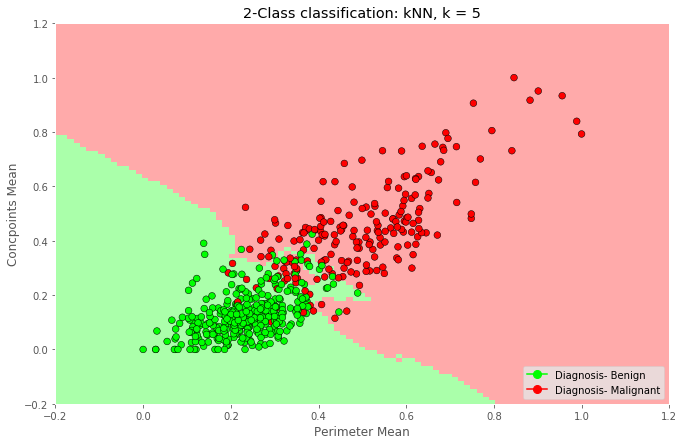

In [19]:
plot_decision_boundary(Z, X, y, " kNN, k = 5")

#### Step 3. Describe your observations. How good is kNN in picking up the actual shape? Does it also pick up noise? #### 

**k-NN predicts the diagnosis for our test grid fairly well. However, it seems to yield a high variance model. It picks up noise and leads to overfitting, due to which the actual shape might not have been captured. **

### 2.2 Logistic Regression ###

#### Step 1. Fit a logistic regression model with these two features. ####

In [20]:
wdbc_log_class = LogisticRegression().fit(X, y)

#### Step 2. Predict the diagnosis on a similar grid.####

In [21]:
Z = wdbc_log_class.predict_proba(np.c_[xx.ravel(), yy.ravel()])

In [22]:
Z = Z[:,1].reshape(xx.shape)

#### Step 3. Create a similar plot.####

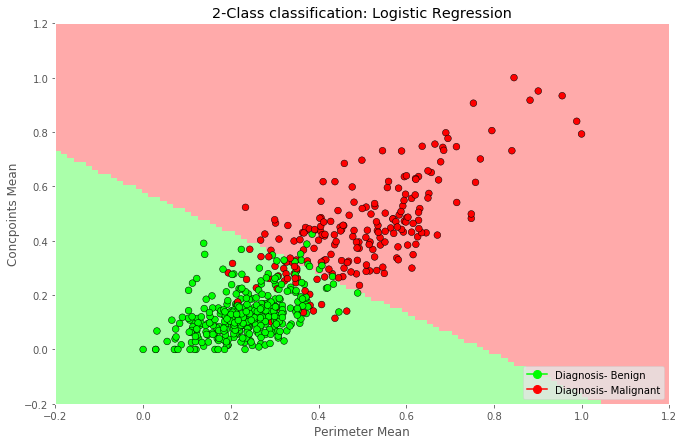

In [23]:
plot_decision_boundary(Z, X, y, " Logistic Regression")

#### Step 4. Describe your observations. How does the result for kNN compare to that for Logistic Regression? ####

**With Logistic Regression the decision boundary does not seem to be picking up noise, therefore we are neither overfitting nor underfitting. Overall, this classifier seems to be performing better than the k-NN model in terms of the predictions.**

### 2.3 Feature Engineering ###

#### Step 1. Use these two features to compute some new ones.####

In [24]:
# new dataframe with our original features termed x and y
wdbc_features = pd.DataFrame({'x':scaled_wdbc['perimeter.mean'], 'y':scaled_wdbc['concpoints.mean']})

In [25]:
# create some higher complexity features, derived from the original ones
wdbc_features['x^2'] = wdbc_features[['x']] ** 2
wdbc_features['y^2'] = wdbc_features[['y']] ** 2
wdbc_features['xy'] = wdbc_features['x'] * wdbc_features['y']
wdbc_features['x^2y'] = (wdbc_features['x'] ** 2)  * wdbc_features['y']
wdbc_features['xy^2'] = wdbc_features['x']  * (wdbc_features['y'] ** 2)

In [26]:
# compute corresponding feature values for our mesh grid (test data)
xx2 = xx ** 2
yy2 = yy ** 2
xx_yy = xx * yy
xx2_yy = (xx ** 2) * yy
xx_yy2 = xx * (yy ** 2)

#### Step 2. Fit a logistic regression model.####

In [27]:
# pick the original as well as some engineered features
X = wdbc_features[['x', 'y', 'x^2', 'y^2']].as_matrix()

In [28]:
wdbc_log_class = LogisticRegression(solver= 'lbfgs', tol=1e-12).fit(X, y) # Fit a logistic model for new feature set
Z = wdbc_log_class.predict_proba(np.c_[xx.ravel(), yy.ravel(), xx2.ravel(), yy2.ravel()]) # Predict probabilities for our mesh
Z = Z[:,1].reshape(xx.shape)

#### Step 3. Create the decision boundary plot. ####

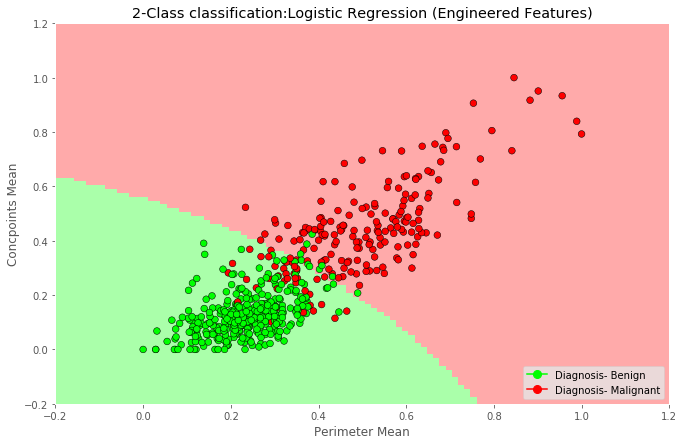

In [29]:
plot_decision_boundary(Z, X, y, "Logistic Regression (Engineered Features)")

#### Step 4. Comment on the shape of the boundary.####

**Adding our engineered features to the model results in a curved decision boundary. This implies that by increasing model complexity we may be overfitting on training data, leading to lower prediction accuracy for test data.**

#### Step 5. Repeat the exercise a few times where you pick/engineer different new features.####

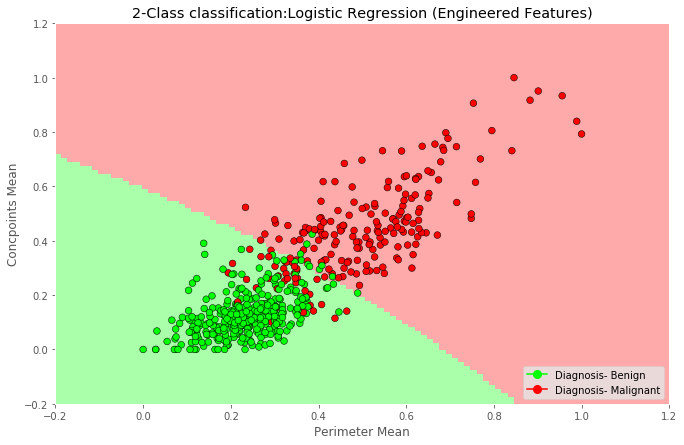

In [30]:
# Adding an additional feature xy
X = wdbc_features[['x', 'y', 'x^2', 'y^2', 'xy']].as_matrix()
wdbc_log_class = LogisticRegression(solver= 'lbfgs', tol=1e-12).fit(X, y)
Z = wdbc_log_class.predict_proba(np.c_[xx.ravel(), yy.ravel(), xx2.ravel(), yy2.ravel(), xx_yy.ravel()])
Z = Z[:,1].reshape(xx.shape)
plot_decision_boundary(Z, X, y, "Logistic Regression (Engineered Features)")

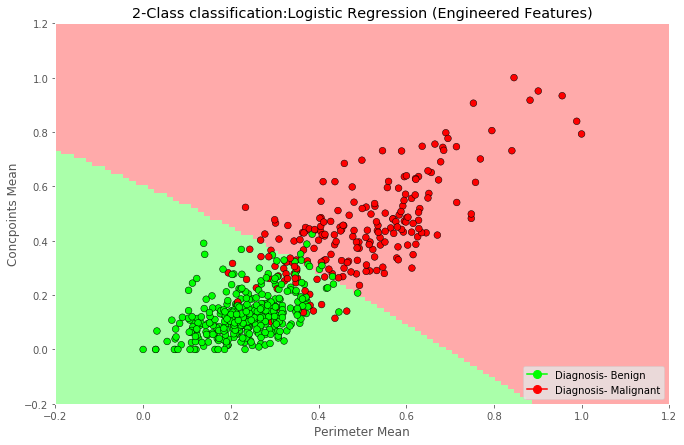

In [31]:
# Adding two additional features of degree 3
X = wdbc_features[['x', 'y', 'x^2', 'y^2', 'xy', 'x^2y', 'xy^2']].as_matrix()
wdbc_log_class = LogisticRegression(solver= 'lbfgs', tol=1e-12).fit(X, y)
Z = wdbc_log_class.predict_proba(np.c_[xx.ravel(), yy.ravel(), xx2.ravel(), yy2.ravel(), 
                                       xx_yy.ravel(), xx2_yy.ravel(), xx_yy2.ravel()])
Z = Z[:,1].reshape(xx.shape)
plot_decision_boundary(Z, X, y, "Logistic Regression (Engineered Features)")

### 3. Use the full data ###

### 3.1 Cross Validation ###

#### Step 1. You should do k-fold CV (k > 10) with the following tasks: ####
**a. Fit logistic regression model on training data using all existing features. You may also add your
engineered features if you wish.  
b. Calculate accuracy, precision and recall on the validation data.**

In [32]:
# Extract all features, except for the outcome variable
wdbc_features = pd.DataFrame(wdbc_reduced[wdbc_reduced.columns.difference(['diagnosis'])])
# Scale all features
scaler = MinMaxScaler()
scaler.fit(wdbc_features)
scaled_wdbc = pd.DataFrame(scaler.transform(wdbc_features),columns=list(wdbc_features.columns))

In [33]:
# Function to perform k fold cross validation
def perform_k_fold(penalty, lambd, indices, X, y, k):
    precision = np.empty(k)
    accuracy = np.empty(k)
    recall = np.empty(k)

    for i in range(k):
        itest = indices[i::k] # Test set indices
        itrain = list(set(indices).difference(itest)) # Training set indices
        testX = X[itest] # Features from test data
        testY = y[itest] # Outcome from test data
        trainX = X[itrain] # Features from training data
        trainY = y[itrain] # Outcome from training data
        log_model = LogisticRegression(penalty=penalty, C=1/lambd).fit(trainX,trainY) # Fitting a logistic estimator
        predicts = log_model.predict(testX)  # Predict on the test set
        # Compute model performance metrics
        accuracy[i] = accuracy_score(testY, predicts)
        recall[i] = recall_score(testY, predicts)
        precision[i] = precision_score(testY, predicts)
        
    return np.mean(accuracy), np.mean(precision), np.mean(recall)

#### Step 2. Report the average accuracy, precision, and recall over your CV runs.####

In [34]:
np.random.seed(0)
X = scaled_wdbc.as_matrix()
indices = np.arange(len(scaled_wdbc))
np.random.shuffle(indices)
accuracy, precision, recall = perform_k_fold("l2", 1, indices, X, y, 10)
print("Mean Accuracy:", accuracy)
print("Mean Precision:", precision)
print("Mean Recall:", recall)

Mean Accuracy: 0.9630952380952381
Mean Precision: 0.99
Mean Recall: 0.9107014274817479


### 3.2 Regularization ###

#### Step 1. Pick a type of regularization (lasso, ridge, elastic net). ####

**Here we choose Ridge regularization**

#### Step 2. Create a wide list of regularization parameters. Pick a number of values inside this range. ####
**The range of values chosen is from 1e-6 to 1e+6**

#### Step 3. For each lambda in this range, repeat the CV process in exercise 3.1 above. Compute accuracy, precision, recall. ####

In [35]:
# Function to perform Ridge Regularization and compute metrics
def perform_regularization(penalty, indices):
    num_values = 13 # number of lambda values
    precision = np.empty(num_values)
    accuracy = np.empty(num_values)
    recall = np.empty(num_values)
    lambd_vals = np.empty(num_values)
    exp = -6
    for i in range(13):
        lambd = 10**(exp + i)  # Pick a different lambda for each iteration
        lambd_vals[i] = lambd
        accuracy[i], precision[i], recall[i] = perform_k_fold("l2", lambd, indices, X, y, 10) # Compute metrics
    return lambd_vals, precision, accuracy, recall

In [36]:
lambda_vals, precision_vals, accuracy_vals, recall_vals = perform_regularization("l2", indices)

C:\Users\harka\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Step 4. Report the results as a function of lambda. ####

In [37]:
# Organize the results into a data frame.
reg_results = pd.DataFrame({'Lambda': lambda_vals, 'Accuracy': accuracy_vals, 
                            'Precision': precision_vals, 'Recall': recall_vals}, 
                           columns=['Lambda', 'Accuracy', 'Precision', 'Recall'])
reg_results

,Lambda,Accuracy,Precision,Recall
0,0.000001,0.950815,0.923788,0.951851
1,0.000010,0.959618,0.943751,0.951851
2,0.000100,0.964881,0.957069,0.949184
3,0.001000,0.966635,0.959721,0.949422
4,0.010000,0.973622,0.976111,0.948507
5,0.100000,0.973622,0.986304,0.939921
6,1.000000,0.963095,0.990000,0.910701
7,10.000000,0.933239,0.989474,0.829378
8,100.000000,0.875188,0.994118,0.676471
9,1000.000000,0.703102,1.000000,0.225756


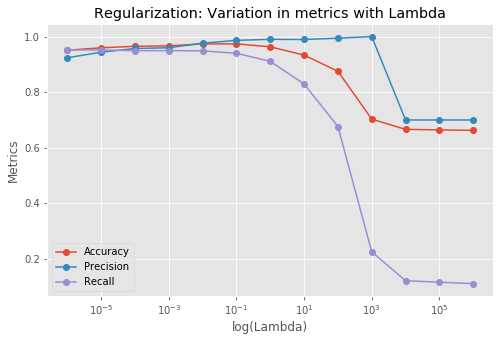

In [38]:
# Plot the data
plt.figure(figsize=(8,5))
plt.plot(lambda_vals, accuracy_vals, marker='o')
plt.plot(lambda_vals, precision_vals, marker='o')
plt.plot(lambda_vals, recall_vals, marker='o')
plt.xscale('log')
plt.xlabel('log(Lambda)')
plt.ylabel('Metrics')
plt.title('Regularization: Variation in metrics with Lambda')
plt.legend(['Accuracy', 'Precision', 'Recall'], loc='lower left')

#### Step 5. Report the best regularization parameters, and the best results.####

**The best regularization parameter is Lambda = 0.01, for which the results are:**
**Accuracy = 0.973622	
Precision = 0.976111
Recall = 0.948507**

Note: We could have chosen Lambda = 0.1 as well, however we've given more importance to Recall over Precision.

### 4. ROC Curve: which estimator is the best  ###

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

#### Step 1. Split your data into testing and training sets####

In [49]:
x_train, x_test, y_train, y_test = train_test_split(scaled_wdbc, y, test_size= 1 / 3, random_state = 1) # Test proportion is 1/3

#### 2. Using your training data, estimate (a few) k-NN models, Naive Bayes model, and logistic regression.####
#### 3. For each of the models, predict the probabilites on the test data. ####
#### 4. Pick a number of thresholds between 0 and 1 (for instance, 0, 0.1, 0.2, ...). For each model and each threshold, treat your predictions to be 1 if it it's probability is at least as big as the threshold. ####
#### 5. Based on these predictions, compute false positive rate and true positive rate. ####

In [50]:
# Function to generate True Positive and False Positive rate for given classifier.
def generate_roc_stats(xtest, ytest, classifier):
    nsteps = 50
    tp = np.empty((nsteps,1))
    fp = np.empty_like(tp)
    haty = classifier.predict_proba(xtest)[:,1]  # Get predicted probabilities on the test data
    for i, threshold in enumerate(np.linspace(0, 1, nsteps)):  # Create increments for threshold
        # Compute True Positve and False Positive rate
        tp[i] = np.sum(np.logical_and(ytest == 1, haty > threshold))/np.sum(ytest)
        fp[i] = np.sum(np.logical_and(ytest == 0, haty > threshold))/np.sum(ytest == 0)
    return tp, fp
    

#### a) k-NN ####

##### k = 1 #####

In [51]:
knn_class = KNeighborsClassifier(n_neighbors=1).fit(x_train.as_matrix(), y_train)
tp_knn1, fp_knn1 = generate_roc_stats(x_test.as_matrix(), y_test, knn_class)


##### k = 5 #####

In [52]:
knn_class5 = KNeighborsClassifier(n_neighbors=5).fit(x_train.as_matrix(), y_train)
tp_knn5, fp_knn5 = generate_roc_stats(x_test.as_matrix(), y_test, knn_class5)

##### k = 25 #####

In [53]:
knn_class25 = KNeighborsClassifier(n_neighbors=25).fit(x_train.as_matrix(), y_train)
tp_knn25, fp_knn25 = generate_roc_stats(x_test.as_matrix(), y_test, knn_class25)

#### b) Naive Bayes ####

In [54]:
nb_class = GaussianNB().fit(x_train.as_matrix(), y_train)
tp_nb, fp_nb = generate_roc_stats(x_test.as_matrix(), y_test, nb_class)

#### c) Logistic Regression ####

In [55]:
log_class = LogisticRegression(C=1/0.01).fit(x_train.as_matrix(), y_train)  # Lambda based on Ridge Regularization results
tp_log, fp_log = generate_roc_stats(x_test.as_matrix(), y_test, log_class)

#### Step 6. Plot these rates for each threshold and model.####

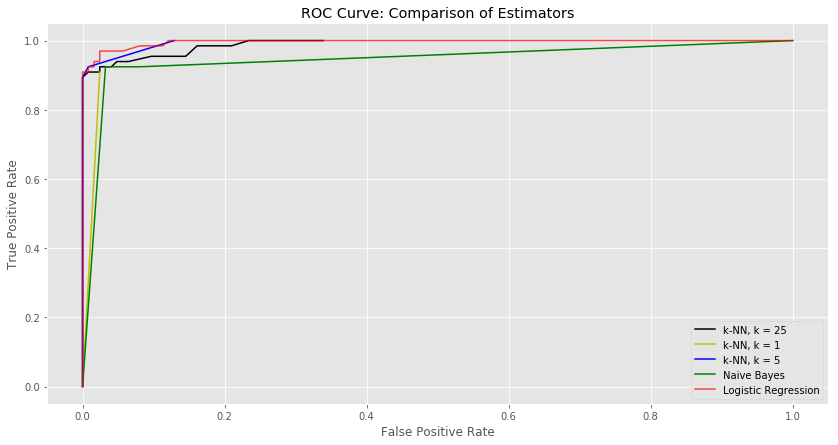

In [56]:
plt.figure(figsize=(14,7))
plt.plot(fp_knn25, tp_knn25, c = 'k')
plt.plot(fp_knn1, tp_knn1, c = 'y')
plt.plot(fp_knn5, tp_knn5, c = 'b')
plt.plot(fp_nb, tp_nb, c = 'g')
plt.plot(fp_log, tp_log, c = 'r', alpha = 0.7)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Comparison of Estimators')
plt.legend(['k-NN, k = 25', 'k-NN, k = 1', 'k-NN, k = 5',
            'Naive Bayes', 'Logistic Regression'], loc='lower right')
plt.show()


#### 7. Comment your results. Which model is the best? ####

**Based on the generated ROC curves, we note that Naive Bayes and k-NN with 1 neighbor are the worst performing models. Further, we see that Logistic Regression has the greatest area under the curve, and is thus the best model among those analyzed. This is followed by k-NN with 5 neighbors and 25 neighbors.**